In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

data = datasets.load_iris()
dataSet = pd.concat([pd.DataFrame(data.data),pd.DataFrame(data.target)],axis = 1)
dataSet = pd.DataFrame(dataSet)


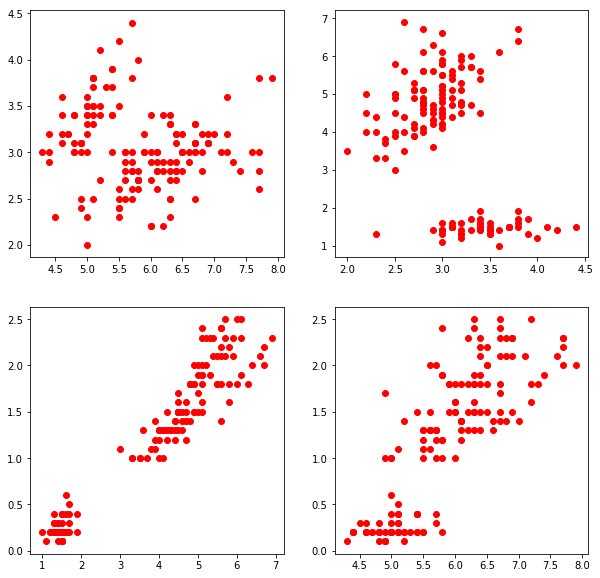

In [155]:
fig = plt.figure(figsize = (10,10))
fig1 = fig.add_subplot(221)
plt.scatter(dataSet.iloc[:,0],dataSet.iloc[:,1],c = 'r')
fig2 = fig.add_subplot(222)
plt.scatter(dataSet.iloc[:,1],dataSet.iloc[:,2],c = 'r')
fig2 = fig.add_subplot(223)
plt.scatter(dataSet.iloc[:,2],dataSet.iloc[:,3],c = 'r')
fig2 = fig.add_subplot(224)
plt.scatter(dataSet.iloc[:,0],dataSet.iloc[:,3],c = 'r')
plt.show()

In [156]:
'''
function:计算两个函数之间的欧式距离
param:
    两个array数据集
return:
    两个数据集之间的欧式距离（此处用距离平方和代替距离）
'''
def distEclud(arrA,arrB):
    d = arrA - arrB
    dist = np.sum(np.power(d,2),axis = 1)
    return dist

In [157]:
'''
function:随机生成k个质心
param:
    dataSet:包含标签的数据集
    k:簇的个数
return：
    data_cent:k个质心
'''
def randCent(dataSet,k):
    n = dataSet.shape[1]
    data_min = dataSet.iloc[:,:n - 1].min()
    data_max = dataSet.iloc[:,n - 1].max()
    data_cent = np.random.uniform(data_min,data_max,(k,n-1))
    return data_cent

In [158]:
data_cent = randCent(dataSet,2)

In [159]:
data_cent

array([[2.60268925, 2.        , 1.09679725, 0.93847275],
       [2.76856846, 2.        , 1.51624905, 0.93390343]])

In [160]:
'''
function:k-均值聚类算法
param:
    dataSet:带标签的数据集
    k:簇的个数
    disMeas:距离计算函数
    createCent:随机质心生成函数
return:
    centroids:质心
    result_set:所有数据划分结果
'''
def kMeans(dataSet,k,distMeas = distEclud,createCent = randCent):
    m,n = dataSet.shape
    centroids = createCent(dataSet,k)
    clusterAssment = np.zeros((m,3))
    clusterAssment[:,0] = np.inf
    clusterAssment[:,1:3] = -1
    result_set = pd.concat([dataSet,pd.DataFrame(clusterAssment)],axis = 1,
                          ignore_index = True)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            dist = distMeas(dataSet.iloc[i,:n-1].values,centroids)
            result_set.iloc[i,n] = dist.min()
            result_set.iloc[i,n+1] = np.where(dist == dist.min())[0]
        clusterChanged = not(result_set.iloc[:,-1] == result_set.iloc[:,-2]).all()
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n-1].values
            result_set.iloc[:,-1] = result_set.iloc[:,-2]
    return centroids,result_set
    

In [161]:
data_cents,data_result = kMeans(dataSet,4)

In [162]:
data_result.head()

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,0,0.118730,0.0,0.0
1,4.9,3.0,1.4,0.2,0,0.048450,1.0,1.0
2,4.7,3.2,1.3,0.2,0,0.017541,1.0,1.0
3,4.6,3.1,1.5,0.2,0,0.022996,1.0,1.0
4,5.0,3.6,1.4,0.2,0,0.154214,0.0,0.0


In [163]:
data_cents

array([[5.21612903, 3.53870968, 1.68064516, 0.35806452],
       [4.70909091, 3.10909091, 1.39545455, 0.19090909],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

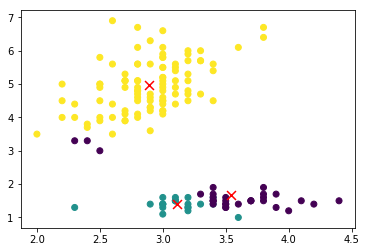

In [164]:
plt.scatter(data_result.iloc[:,1],data_result.iloc[:,2],c = data_result.iloc[:,-1])
plt.scatter(data_cents[:,1],data_cents[:,2],color = 'r',marker='x',s=80)
plt.show()

In [175]:
'''
function：聚类学习曲线
param:
    dataSet:原始数据集
    cluster:lmeans聚类方法
    k：簇的个数
return:
    误差平方和
'''
def kclearningCurve(dataSet,cluster = kMeans,k=10):
    n = dataSet.shape[1]
    SSE = []
    for i in range(1,k):
        centroids,result_set = cluster(dataSet,i+1)
        SSE.append(result_set.iloc[:,n].sum())
    plt.plot(range(2,k+1),SSE,'--o')
    return SSE

In [176]:
kclearningCurve(dataSet)

[680.8243999999997,
 152.36870647733917,
 152.36870647733917,
 145.27932203646048,
 152.36870647733917,
 78.94084142614598,
 57.34540931571815,
 152.36870647733917,
 78.94506582597724]

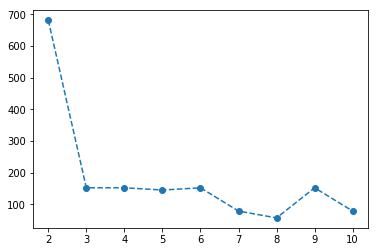

In [177]:
plt.show()